In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU,Dense,Embedding
from sklearn.model_selection import train_test_split

import re
from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import random as rn
import seaborn as sns
pd.options.display.max_rows = None

2022-05-03 22:05:13.063902: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-03 22:05:13.063930: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
data_df = pd.read_csv("financial_sentiment.csv")
data_df.head()

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


In [3]:
data_df["Sentiment"].unique()

array(['positive', 'negative', 'neutral'], dtype=object)

In [4]:
MEAN_LEN_SENTENCES = np.mean([len(sentence) for sentence in data_df["Sentence"]])
print(MEAN_LEN_SENTENCES)

117.02225265320097


DATA VISUALIZATION

<AxesSubplot:>

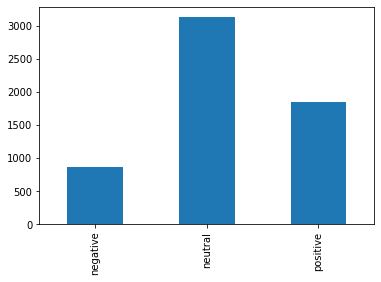

In [5]:
data_df['Sentiment'].value_counts().sort_index().plot.bar()

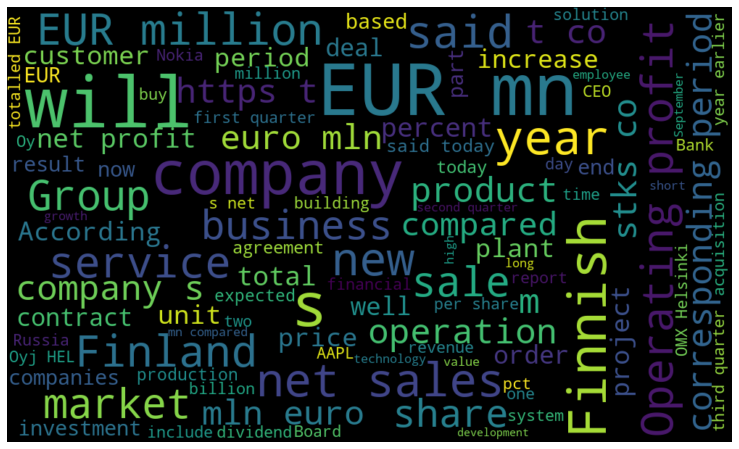

In [6]:
txt = ' '.join(rev for rev in data_df.Sentence)
plt.figure(figsize=(15,8))

wordcloud = WordCloud(
            background_color = 'black',
            max_font_size = 100,
            max_words = 100,
            width = 1000,
            height = 600
            ).generate(txt)


plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.savefig('Word_frequency')
plt.show()

In [7]:
positive = data_df[data_df['Sentiment']=='positive']
neutral = data_df[data_df['Sentiment']=='neutral']
negative = data_df[data_df['Sentiment']=='negative']

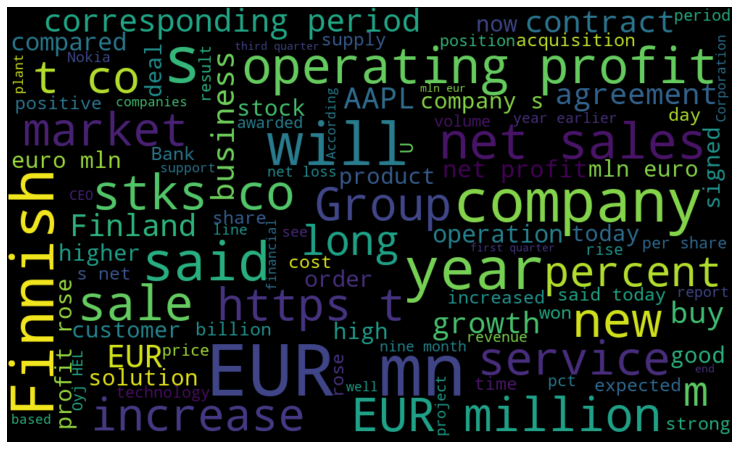

In [8]:
txt = ' '.join(rev for rev in positive.Sentence)
plt.figure(figsize=(15,8))

wordcloud = WordCloud(
            background_color = 'black',
            max_font_size = 100,
            max_words = 100,
            width = 1000,
            height = 600
            ).generate(txt)


plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.savefig('positive')
plt.show()

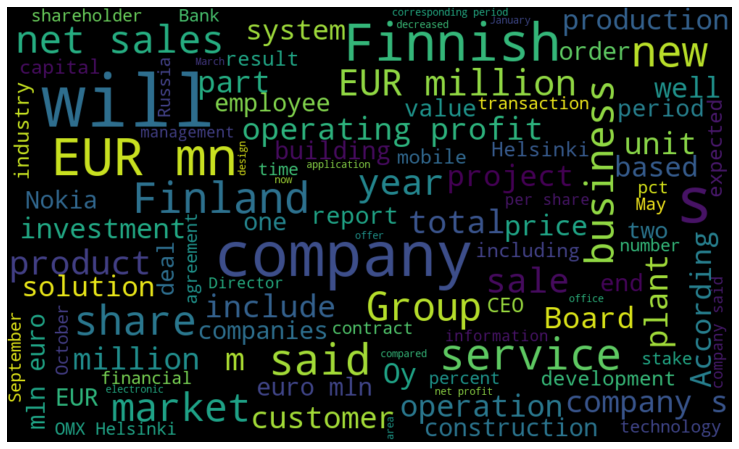

In [9]:
txt = ' '.join(rev for rev in neutral.Sentence)
plt.figure(figsize=(15,8))

wordcloud = WordCloud(
            background_color = 'black',
            max_font_size = 100,
            max_words = 100,
            width = 1000,
            height = 600
            ).generate(txt)


plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.savefig('neutral')
plt.show()

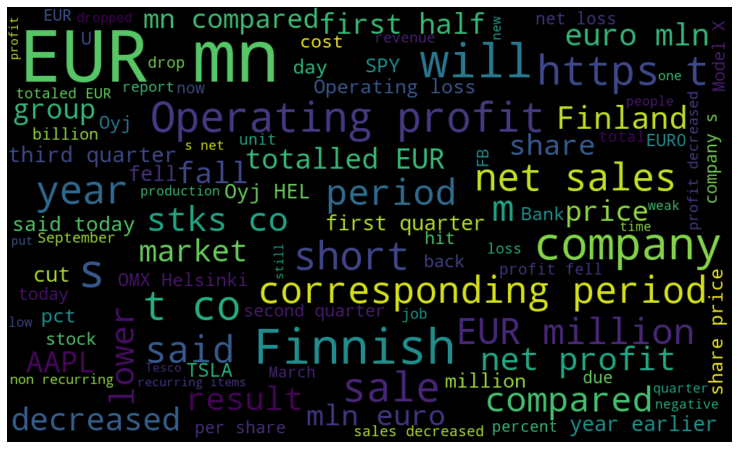

In [10]:
txt = ' '.join(rev for rev in negative.Sentence)
plt.figure(figsize=(15,8))

wordcloud = WordCloud(
            background_color = 'black',
            max_font_size = 100,
            max_words = 100,
            width = 1000,
            height = 600
            ).generate(txt)


plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.savefig('negative')
plt.show()

In [11]:
def remove_num(texts):
   output = re.sub(r'\d+', '', texts)
   return output

def unify_whitespaces(x):
    cleaned_string = re.sub(' +', ' ', x)
    return cleaned_string 

def remove_symbols(x):
    cleaned_string = re.sub(r"[^a-zA-Z0-9?!.,]+", ' ', x)
    return cleaned_string

def remove_punctuation(text):
    final = "".join(u for u in text if u not in ("?", ".", ";", ":",  "!",'"',','))
    return final

from nltk.stem import PorterStemmer, WordNetLemmatizer
stop=set(stopwords.words("english"))
stemmer=PorterStemmer()
lemma=WordNetLemmatizer()

def remove_stopword(text):
   text=[word.lower() for word in text.split() if word.lower() not in stop]
   return " ".join(text)

from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
def Stemming(text):
   stem=[]
   stopword = stopwords.words('english')
   snowball_stemmer = SnowballStemmer('english')
   word_tokens = nltk.word_tokenize(text)
   stemmed_word = [snowball_stemmer.stem(word) for word in word_tokens]
   stem=' '.join(stemmed_word)
   return stem

def cleaning(df,review):
    df['Sentence'] = df['Sentence'].str.lower()
    df['Sentence'] = df['Sentence'].apply(remove_num)
    df['Sentence'] = df['Sentence'].apply(remove_symbols)
    df['Sentence'] = df['Sentence'].apply(remove_punctuation)
    df['Sentence'] = df['Sentence'].apply(remove_stopword)
    df['Sentence'] = df['Sentence'].apply(unify_whitespaces)
    df['Sentence'] = df['Sentence'].apply(Stemming)

In [12]:
cleaning(data_df,'Sentence')

In [13]:
data_df

,Sentence,Sentiment
0,geosolut technolog leverag benefon gps solut p...,positive
1,esi low bk real possibl,negative
2,last quarter componenta net sale doubl eurm eu...,positive
3,accord finnish russian chamber commerc major c...,neutral
4,swedish buyout firm sold remain percent stake ...,neutral
5,spi surpris see green close,positive
6,shell billion bg deal meet sharehold skeptic,negative
7,ssh communic secur corp stock exchang releas o...,negative
8,kone net sale rose year year first nine month,positive
9,stockmann depart store total floor space squar...,neutral


In [14]:
x = data_df["Sentence"]
y = data_df["Sentiment"]

Encoding

In [15]:
y_encoded = pd.get_dummies(y)
y_encoded.head()

,negative,neutral,positive
0,0,0,1
1,1,0,0
2,0,0,1
3,0,1,0
4,0,1,0


In [16]:
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(x)

In [17]:
x_tokenized = tokenizer.texts_to_sequences(x)
print("Number of tokenized entries:",len(x_tokenized))

Number of tokenized entries: 5842


In [18]:
maxlen = 130
x_padded = pad_sequences(x_tokenized,maxlen=maxlen)
x_padded.shape

(5842, 130)

In [19]:
x_train,x_test_eval,y_train,y_test_eval = train_test_split(x_padded,
                                                           y_encoded,
                                                           test_size=0.4,
                                                           random_state=42)

x_test,x_eval,y_test,y_eval = train_test_split(x_test_eval,
                                               y_test_eval,
                                               test_size=0.5,
                                               random_state=42)

print("Number of training entries: ",x_train.shape)
assert len(x_train) == len(y_train)

print("Number of testing entries: ",x_test.shape)
assert len(x_test) == len(y_test)

print("Number of evaluating entries: ",x_eval.shape)
assert len(x_eval) == len(y_eval)

Number of training entries:  (3505, 130)
Number of testing entries:  (1168, 130)
Number of evaluating entries:  (1169, 130)


In [20]:
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 64

In [21]:
vocab_size

7828

In [45]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
model = Sequential()
model.add(Embedding(input_dim=vocab_size,output_dim=embedding_dim,input_length=maxlen))
model.add(GRU(100, dropout = 0.4))
model.add(Dense(128, activation="relu"))
model.add(Dense(3,activation="softmax"))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 130, 64)           500992    
_________________________________________________________________
gru_6 (GRU)                  (None, 100)               49800     
_________________________________________________________________
dense_12 (Dense)             (None, 128)               12928     
_________________________________________________________________
dense_13 (Dense)             (None, 3)                 387       
Total params: 564,107
Trainable params: 564,107
Non-trainable params: 0
_________________________________________________________________


In [46]:
#history = model.fit(X_train_seq_pad, y_train,batch_size=BATCH_SIZE, epochs=20,validation_data=(X_test_seq_pad, y_test), callbacks=[early_stop])
history = model.fit(x_train, y_train,epochs=50,validation_data=(x_eval,y_eval),batch_size=64,verbose=2,callbacks=[es])

Epoch 1/50
55/55 - 7s - loss: 0.9952 - acc: 0.5275 - val_loss: 0.9370 - val_acc: 0.5406
Epoch 2/50
55/55 - 5s - loss: 0.8282 - acc: 0.6160 - val_loss: 0.8495 - val_acc: 0.6219
Epoch 3/50
55/55 - 5s - loss: 0.6140 - acc: 0.7381 - val_loss: 0.8088 - val_acc: 0.6527
Epoch 4/50
55/55 - 5s - loss: 0.4079 - acc: 0.8328 - val_loss: 0.8563 - val_acc: 0.6689
Epoch 5/50
55/55 - 5s - loss: 0.3024 - acc: 0.8650 - val_loss: 0.9712 - val_acc: 0.6561
Epoch 6/50
55/55 - 5s - loss: 0.2544 - acc: 0.8779 - val_loss: 1.0831 - val_acc: 0.6493
Epoch 7/50
55/55 - 5s - loss: 0.2248 - acc: 0.8933 - val_loss: 1.1247 - val_acc: 0.6595
Epoch 00007: early stopping


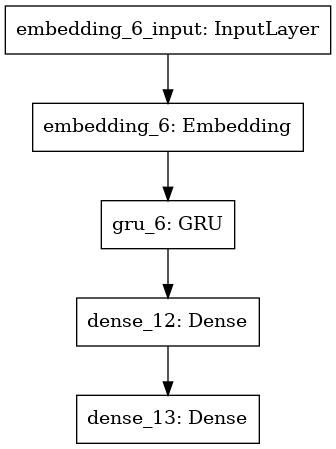

In [47]:
from tensorflow.keras.utils import plot_model
plot_model(
    model,
    to_file='model.png',
    show_shapes=False,
    show_dtype=False,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=False,
    dpi=96,
)

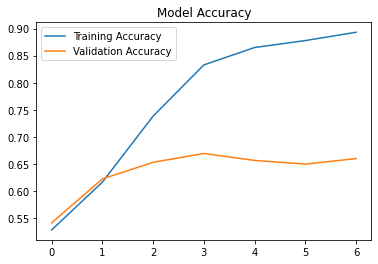

In [48]:
history.history["acc"]

plt.title("Model Accuracy")
sns.lineplot(x=history.epoch,y=history.history["acc"])
sns.lineplot(x=history.epoch,y=history.history["val_acc"])
plt.legend(["Training Accuracy","Validation Accuracy"])
plt.show()

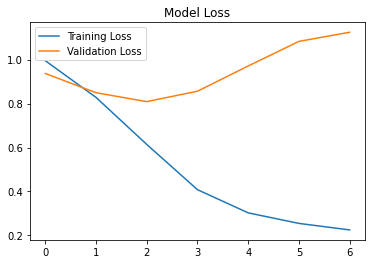

In [49]:
history.history["loss"]

plt.title("Model Loss")
sns.lineplot(x=history.epoch,y=history.history["loss"])
sns.lineplot(x=history.epoch,y=history.history["val_loss"])
plt.legend(["Training Loss","Validation Loss"])
plt.show()

In [50]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
model = Sequential()
model.add(Embedding(input_dim=vocab_size,output_dim=embedding_dim,input_length=maxlen))
model.add(GRU(100, dropout = 0.6))
model.add(Dense(128, activation="relu"))
model.add(Dense(3,activation="softmax"))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 130, 64)           500992    
_________________________________________________________________
gru_7 (GRU)                  (None, 100)               49800     
_________________________________________________________________
dense_14 (Dense)             (None, 128)               12928     
_________________________________________________________________
dense_15 (Dense)             (None, 3)                 387       
Total params: 564,107
Trainable params: 564,107
Non-trainable params: 0
_________________________________________________________________


In [51]:
#history = model.fit(X_train_seq_pad, y_train,batch_size=BATCH_SIZE, epochs=20,validation_data=(X_test_seq_pad, y_test), callbacks=[early_stop])
history = model.fit(x_train, y_train,epochs=50,validation_data=(x_eval,y_eval),batch_size=64,verbose=2,callbacks=[es])

Epoch 1/50
55/55 - 7s - loss: 0.9922 - acc: 0.5295 - val_loss: 0.9379 - val_acc: 0.5406
Epoch 2/50
55/55 - 5s - loss: 0.8391 - acc: 0.6140 - val_loss: 0.8458 - val_acc: 0.6193
Epoch 3/50
55/55 - 5s - loss: 0.6907 - acc: 0.7047 - val_loss: 0.8120 - val_acc: 0.6518
Epoch 4/50
55/55 - 5s - loss: 0.5552 - acc: 0.7615 - val_loss: 0.8178 - val_acc: 0.6801
Epoch 5/50
55/55 - 5s - loss: 0.4424 - acc: 0.8217 - val_loss: 0.8124 - val_acc: 0.6792
Epoch 6/50
55/55 - 6s - loss: 0.3459 - acc: 0.8471 - val_loss: 0.8660 - val_acc: 0.6689
Epoch 7/50
55/55 - 5s - loss: 0.2942 - acc: 0.8676 - val_loss: 1.0566 - val_acc: 0.6758
Epoch 8/50
55/55 - 5s - loss: 0.2648 - acc: 0.8739 - val_loss: 1.0802 - val_acc: 0.6664
Epoch 00008: early stopping


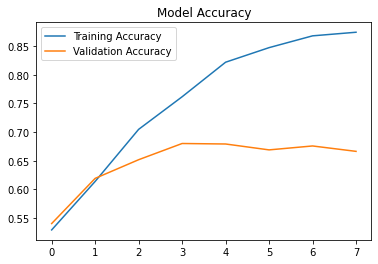

In [52]:
history.history["acc"]

plt.title("Model Accuracy")
sns.lineplot(x=history.epoch,y=history.history["acc"])
sns.lineplot(x=history.epoch,y=history.history["val_acc"])
plt.legend(["Training Accuracy","Validation Accuracy"])
plt.show()

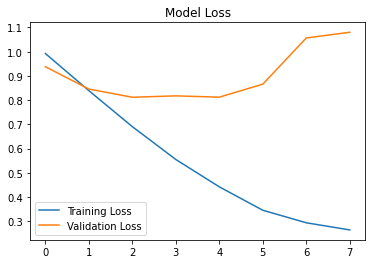

In [53]:
history.history["loss"]

plt.title("Model Loss")
sns.lineplot(x=history.epoch,y=history.history["loss"])
sns.lineplot(x=history.epoch,y=history.history["val_loss"])
plt.legend(["Training Loss","Validation Loss"])
plt.show()

In [54]:
model = Sequential()
model.add(Embedding(input_dim=vocab_size,output_dim=embedding_dim,input_length=maxlen))
model.add(GRU(100, dropout = 0.8))
model.add(Dense(128, activation="relu"))
model.add(Dense(3,activation="softmax"))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 130, 64)           500992    
_________________________________________________________________
gru_8 (GRU)                  (None, 100)               49800     
_________________________________________________________________
dense_16 (Dense)             (None, 128)               12928     
_________________________________________________________________
dense_17 (Dense)             (None, 3)                 387       
Total params: 564,107
Trainable params: 564,107
Non-trainable params: 0
_________________________________________________________________


In [55]:
#history = model.fit(X_train_seq_pad, y_train,batch_size=BATCH_SIZE, epochs=20,validation_data=(X_test_seq_pad, y_test), callbacks=[early_stop])
history = model.fit(x_train, y_train,epochs=50,validation_data=(x_eval,y_eval),batch_size=64,verbose=2,callbacks=[es])

Epoch 1/50
55/55 - 7s - loss: 1.0076 - acc: 0.5292 - val_loss: 0.9622 - val_acc: 0.5406
Epoch 2/50
55/55 - 5s - loss: 0.9173 - acc: 0.5561 - val_loss: 0.8645 - val_acc: 0.6125
Epoch 3/50
55/55 - 5s - loss: 0.7972 - acc: 0.6536 - val_loss: 0.8263 - val_acc: 0.6364
Epoch 4/50
55/55 - 5s - loss: 0.6921 - acc: 0.7024 - val_loss: 0.7801 - val_acc: 0.6561
Epoch 5/50
55/55 - 5s - loss: 0.5803 - acc: 0.7578 - val_loss: 0.7265 - val_acc: 0.6835
Epoch 6/50
55/55 - 5s - loss: 0.5146 - acc: 0.7854 - val_loss: 0.7225 - val_acc: 0.6801
Epoch 7/50
55/55 - 6s - loss: 0.4417 - acc: 0.8160 - val_loss: 0.7899 - val_acc: 0.6698
Epoch 8/50
55/55 - 5s - loss: 0.4186 - acc: 0.8225 - val_loss: 0.8157 - val_acc: 0.6766
Epoch 9/50
55/55 - 5s - loss: 0.3859 - acc: 0.8334 - val_loss: 0.7960 - val_acc: 0.6792
Epoch 10/50
55/55 - 6s - loss: 0.3626 - acc: 0.8408 - val_loss: 0.8076 - val_acc: 0.6766
Epoch 00010: early stopping


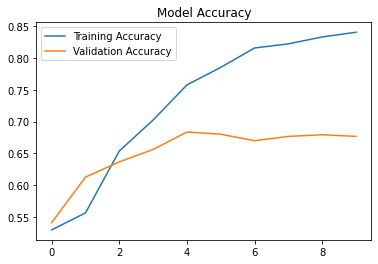

In [56]:
history.history["acc"]

plt.title("Model Accuracy")
sns.lineplot(x=history.epoch,y=history.history["acc"])
sns.lineplot(x=history.epoch,y=history.history["val_acc"])
plt.legend(["Training Accuracy","Validation Accuracy"])
plt.show()

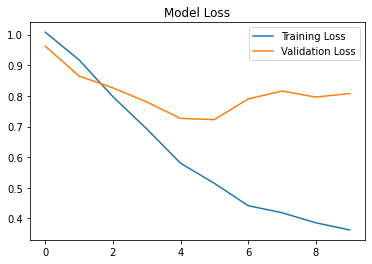

In [57]:
history.history["loss"]

plt.title("Model Loss")
sns.lineplot(x=history.epoch,y=history.history["loss"])
sns.lineplot(x=history.epoch,y=history.history["val_loss"])
plt.legend(["Training Loss","Validation Loss"])
plt.show()

In [58]:

model = Sequential()
model.add(Embedding(input_dim=vocab_size,output_dim=embedding_dim,input_length=maxlen))
model.add(GRU(100, dropout = 0.9))
model.add(Dense(128, activation="relu"))
model.add(Dense(3,activation="softmax"))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 130, 64)           500992    
_________________________________________________________________
gru_9 (GRU)                  (None, 100)               49800     
_________________________________________________________________
dense_18 (Dense)             (None, 128)               12928     
_________________________________________________________________
dense_19 (Dense)             (None, 3)                 387       
Total params: 564,107
Trainable params: 564,107
Non-trainable params: 0
_________________________________________________________________


In [59]:
#history = model.fit(X_train_seq_pad, y_train,batch_size=BATCH_SIZE, epochs=20,validation_data=(X_test_seq_pad, y_test), callbacks=[early_stop])
history = model.fit(x_train, y_train,epochs=50,validation_data=(x_eval,y_eval),batch_size=64,verbose=2,callbacks=[es])

Epoch 1/50
55/55 - 7s - loss: 1.0052 - acc: 0.5181 - val_loss: 0.9689 - val_acc: 0.5406
Epoch 2/50
55/55 - 5s - loss: 0.9507 - acc: 0.5458 - val_loss: 0.9099 - val_acc: 0.5911
Epoch 3/50
55/55 - 6s - loss: 0.8898 - acc: 0.5909 - val_loss: 0.8605 - val_acc: 0.6279
Epoch 4/50
55/55 - 5s - loss: 0.8273 - acc: 0.6300 - val_loss: 0.8358 - val_acc: 0.6467
Epoch 5/50
55/55 - 5s - loss: 0.7690 - acc: 0.6716 - val_loss: 0.8096 - val_acc: 0.6536
Epoch 6/50
55/55 - 5s - loss: 0.7198 - acc: 0.6939 - val_loss: 0.7894 - val_acc: 0.6501
Epoch 7/50
55/55 - 6s - loss: 0.6734 - acc: 0.7118 - val_loss: 0.7587 - val_acc: 0.6578
Epoch 8/50
55/55 - 5s - loss: 0.6237 - acc: 0.7364 - val_loss: 0.7364 - val_acc: 0.6749
Epoch 9/50
55/55 - 6s - loss: 0.5806 - acc: 0.7626 - val_loss: 0.7409 - val_acc: 0.6724
Epoch 10/50
55/55 - 6s - loss: 0.5664 - acc: 0.7641 - val_loss: 0.7215 - val_acc: 0.6784
Epoch 11/50
55/55 - 5s - loss: 0.5257 - acc: 0.7812 - val_loss: 0.7367 - val_acc: 0.6784
Epoch 12/50
55/55 - 5s - loss:

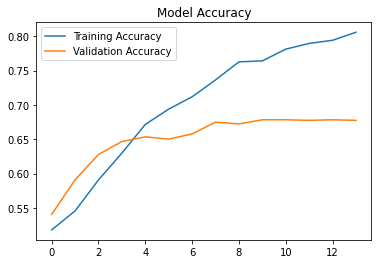

In [60]:
history.history["acc"]

plt.title("Model Accuracy")
sns.lineplot(x=history.epoch,y=history.history["acc"])
sns.lineplot(x=history.epoch,y=history.history["val_acc"])
plt.legend(["Training Accuracy","Validation Accuracy"])
plt.show()

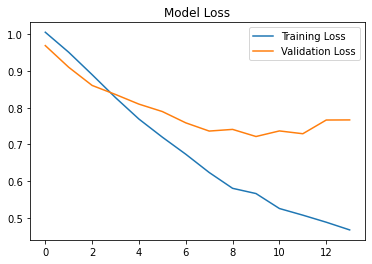

In [61]:
history.history["loss"]

plt.title("Model Loss")
sns.lineplot(x=history.epoch,y=history.history["loss"])
sns.lineplot(x=history.epoch,y=history.history["val_loss"])
plt.legend(["Training Loss","Validation Loss"])
plt.show()

In [69]:

model = Sequential()
model.add(Embedding(input_dim=vocab_size,output_dim=embedding_dim,input_length=maxlen))
model.add(GRU(100, dropout = 0.9))
model.add(Dense(128, activation="relu"))
model.add(Dense(3,activation="softmax"))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, 130, 64)           500992    
_________________________________________________________________
gru_12 (GRU)                 (None, 100)               49800     
_________________________________________________________________
dense_24 (Dense)             (None, 128)               12928     
_________________________________________________________________
dense_25 (Dense)             (None, 3)                 387       
Total params: 564,107
Trainable params: 564,107
Non-trainable params: 0
_________________________________________________________________


In [70]:
history = model.fit(x_train, y_train,epochs=50,validation_data=(x_eval,y_eval),batch_size=64,verbose=2,callbacks=[es])

Epoch 1/50
55/55 - 7s - loss: 1.0019 - acc: 0.5335 - val_loss: 0.9678 - val_acc: 0.5406
Epoch 2/50
55/55 - 5s - loss: 0.9545 - acc: 0.5421 - val_loss: 0.9087 - val_acc: 0.5586
Epoch 3/50
55/55 - 5s - loss: 0.8823 - acc: 0.5977 - val_loss: 0.8631 - val_acc: 0.6236
Epoch 4/50
55/55 - 5s - loss: 0.8180 - acc: 0.6402 - val_loss: 0.8194 - val_acc: 0.6399
Epoch 5/50
55/55 - 6s - loss: 0.7770 - acc: 0.6611 - val_loss: 0.8008 - val_acc: 0.6604
Epoch 6/50
55/55 - 6s - loss: 0.7181 - acc: 0.6950 - val_loss: 0.7864 - val_acc: 0.6664
Epoch 7/50
55/55 - 5s - loss: 0.6798 - acc: 0.7070 - val_loss: 0.7509 - val_acc: 0.6647
Epoch 8/50
55/55 - 5s - loss: 0.6317 - acc: 0.7392 - val_loss: 0.7747 - val_acc: 0.6766
Epoch 9/50
55/55 - 8s - loss: 0.5990 - acc: 0.7515 - val_loss: 0.7300 - val_acc: 0.6809
Epoch 10/50
55/55 - 7s - loss: 0.5702 - acc: 0.7586 - val_loss: 0.7276 - val_acc: 0.6809
Epoch 11/50
55/55 - 6s - loss: 0.5310 - acc: 0.7803 - val_loss: 0.7472 - val_acc: 0.6869
Epoch 12/50
55/55 - 7s - loss:

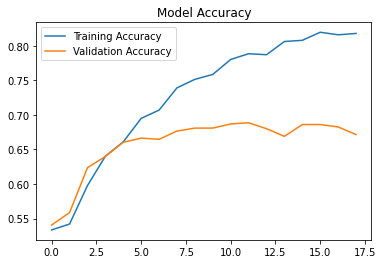

In [71]:
history.history["acc"]

plt.title("Model Accuracy")
sns.lineplot(x=history.epoch,y=history.history["acc"])
sns.lineplot(x=history.epoch,y=history.history["val_acc"])
plt.legend(["Training Accuracy","Validation Accuracy"])
plt.show()

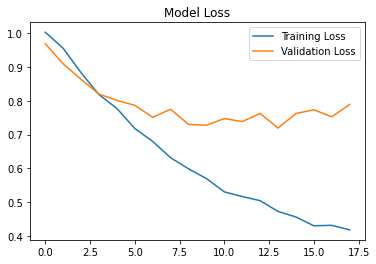

In [72]:
history.history["loss"]

plt.title("Model Loss")
sns.lineplot(x=history.epoch,y=history.history["loss"])
sns.lineplot(x=history.epoch,y=history.history["val_loss"])
plt.legend(["Training Loss","Validation Loss"])
plt.show()

In [73]:
model.evaluate(x_test, y_test)

37/37 [==============================] - 1s 16ms/step - loss: 0.7472 - acc: 0.7038


[0.7471710443496704, 0.7037671208381653]